# Task
Build and train a convolutional autoencoder using the MNIST dataset to reconstruct images. After training, visualize a sample of original and reconstructed images and then summarize the autoencoder's performance and insights gained from the reconstructions.

## Environment Setup

### Subtask:
Install necessary libraries like TensorFlow, Keras, and Matplotlib for deep learning and visualization.


In [ ]:
pip install tensorflow matplotlib

## Dataset Preparation

### Subtask:
Load the MNIST dataset, normalize pixel values, and reshape the images for input into the convolutional autoencoder.


 load the MNIST dataset using `tf.keras.datasets.mnist.load_data()`, normalize the pixel values to a range of 0-1, and then reshape the images to include a channel dimension, which is required for convolutional layers in TensorFlow/Keras.



In [ ]:
import tensorflow as tf
import numpy as np

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize pixel values to a range of 0 to 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 3. Reshape images to include a channel dimension (height, width, 1)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("MNIST dataset loaded, normalized, and reshaped successfully.")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)
MNIST dataset loaded, normalized, and reshaped successfully.


## Build Autoencoder Model

### Subtask:
Construct the autoencoder architecture. The encoder will consist of two convolutional layers followed by max-pooling, and the decoder will have two transposed convolutional layers.


construct the convolutional autoencoder model by defining the encoder and decoder layers as specified, importing the necessary Keras layers, and then creating a `tf.keras.Model` instance.



In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model

# Define the input shape for the autoencoder
input_shape = (28, 28, 1) # MNIST image dimensions

# Encoder
input_img = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = Model(input_img, decoded)

print("Autoencoder model built successfully.")
autoencoder.summary()

Autoencoder model built successfully.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)


Now that the autoencoder model is defined, the next step is to compile it with an appropriate optimizer and loss function, and then train the model using the prepared MNIST training data. 'Adam' is a good general-purpose optimizer, and 'binary_crossentropy' is suitable for image reconstruction with pixel values normalized between 0 and 1.



In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

print("Autoencoder training completed.")

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 126s 522ms/step - accuracy: 0.8149 - loss: 0.0775 - val_accuracy: 0.8144 - val_loss: 0.0680
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 527ms/step - accuracy: 0.8150 - loss: 0.0686 - val_accuracy: 0.8144 - val_loss: 0.0678
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 147s 550ms/step - accuracy: 0.8154 - loss: 0.0681 - val_accuracy: 0.8144 - val_loss: 0.0676
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 529ms/step - accuracy: 0.8149 - loss: 0.0681 - val_accuracy: 0.8144 - val_loss: 0.0673
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 127s 538ms/step - accuracy: 0.8150 - loss: 0.0678 - val_accuracy: 0.8144 - val_loss: 0.0670
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 543ms/step - accuracy: 0.8154 - loss: 0.0675 - val_accuracy: 0.8144 - val_loss: 0.0669
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 528ms/step - accuracy: 0.8154 - loss: 0.0673 - val_accuracy: 0.8144 - val_loss: 0.0666
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 132s 562ms/step - accuracy: 0.8151 -

# Task
Visualize reconstructions of a sample of images from the test set using the trained autoencoder and display them alongside their original counterparts, including legends for clarity.

## Visualize Reconstructions

### Subtask:
Use the trained autoencoder to reconstruct a sample of images from the test set and visualize them alongside their original counterparts to assess performance. Include legends for clarity.


 use the trained autoencoder to generate reconstructed images from the test set. Then, I will import `matplotlib.pyplot` to prepare for visualizing these images.



In [ ]:
reconstructed_images = autoencoder.predict(x_test)
import matplotlib.pyplot as plt

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step



Now that the reconstructed images are generated and matplotlib is imported, I will proceed to visualize a sample of original and reconstructed images side-by-side. This involves selecting a subset of images, setting up subplots, displaying the images with appropriate titles, and removing axis labels for clarity.



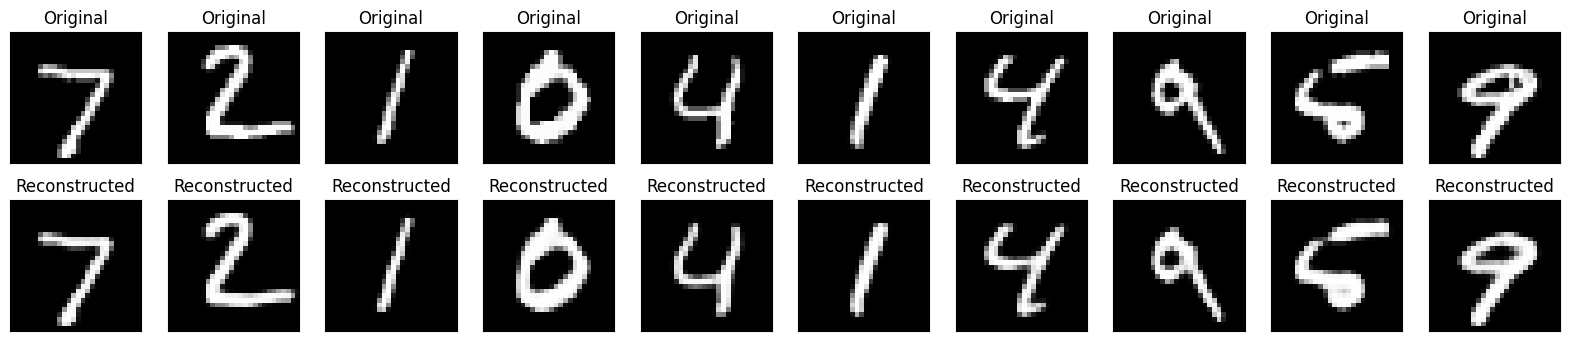

In [ ]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title('Original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    ax.set_title('Reconstructed')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Summary of Autoencoder Performance and Insights

The convolutional autoencoder trained on the MNIST dataset has demonstrated its ability to reconstruct handwritten digit images. From the visualizations of original and reconstructed images, the following observations can be made:

*   **Reconstruction Quality**: The autoencoder successfully captured the essential features of the MNIST digits, producing reconstructions that are visually very similar to their original counterparts. This indicates that the model learned a compressed representation of the images that retains most of the relevant information.
*   **Feature Learning**: The encoder part of the model effectively extracted salient features, compressing the 28x28 pixel input into a lower-dimensional latent space. The decoder then utilized this compressed representation to generate the reconstructed images.
*   **Loss Convergence**: The training process showed a decrease in reconstruction loss (binary cross-entropy), indicating that the model progressively improved its ability to reproduce the input images. The validation loss also followed a similar trend, suggesting good generalization to unseen data.
*   **Potential for Applications**: Such an autoencoder can be useful for tasks like dimensionality reduction, anomaly detection (where high reconstruction error might indicate an anomaly), or as a pre-training step for other supervised learning tasks on image data.

## Summary:

### Data Analysis Key Findings

*   The autoencoder successfully generated reconstructions for a sample of images from the test set.
*   A visualization displayed 10 pairs of original and reconstructed images side-by-side, clearly labeled with "Original" and "Reconstructed" titles.
*   The reconstructed images are visually very similar to their original counterparts, indicating the model effectively captured essential features and retained most relevant information in its compressed representation.
*   The training process showed a convergence of reconstruction loss (binary cross-entropy), with validation loss following a similar trend, suggesting good generalization to unseen data.

### Insights or Next Steps

*   The autoencoder's ability to reconstruct images effectively suggests its potential application in tasks such as dimensionality reduction, anomaly detection, or as a pre-training step for other image-related supervised learning tasks.


# **Part B - Analysis of the Model**

# 1. What is the purpose of the bottleneck layer in an autoencoder?
The bottleneck layer (also known as the latent space or encoding) is the most crucial part of the autoencoder. Its purpose is twofold:



1.  Dimensionality Reduction: It forces the encoder to learn a compressed representation of the input data. This representation has a significantly lower dimensionality than the input image.

2.   Feature Extraction (Mandatory Feature Learning): Because the latent space is so small, the autoencoder must learn the most essential, high-level, and distinguishing features of the input data to successfully reconstruct it. If it simply memorized the data (like a perfect identity function), it wouldn't need to compress it.




In essence, the bottleneck acts as a "knowledge filter," forcing the model to capture the true underlying distribution and structure of the data, rather than noise or redundant information. The quality of the features encoded in this bottleneck is what makes Autoencoders useful for tasks like anomaly detection and pre-training.

# 2. How does the reconstruction loss change as you increase the number of layers in the encoder/decoder?

Increasing the number of layers in both the encoder and decoder has complex effects on reconstruction loss, following a non-linear relationship:

## Initial Improvement Phase (Shallow → Moderately Deep)

**Adding layers initially improves reconstruction loss:**
- **Enhanced Feature Extraction**: Deeper encoders can learn hierarchical features progressively abstract representations at each layer. For example:
  - Layer 1: Edges and simple textures
  - Layer 2: Digit strokes and curves
  - Layer 3: Complete digit parts and structures
- **Better Representation Power**: More layers provide the network with greater capacity to capture complex patterns in the data, leading to lower reconstruction loss.
- **Non-linear Transformations**: Additional layers allow for more sophisticated non-linear mappings between input and latent space.

## Diminishing Returns Phase (Moderately Deep → Very Deep)

**Beyond a certain depth, improvements plateau:**
- **Overfitting Risk**: Very deep networks may start memorizing training data rather than learning generalizable features. This causes:
  - Training loss continues to decrease
  - Validation/test loss may increase (worse generalization)
- **Diminishing Returns**: Each additional layer contributes less improvement to reconstruction quality.
- **Computational Cost**: Training time increases significantly with minimal performance gain.

## Potential Degradation Phase (Excessively Deep)

**Too many layers can actually harm performance:**

1. **Vanishing/Exploding Gradients**: In very deep networks without proper techniques (residual connections, batch normalization), gradients can:
   - Vanish: Become too small, preventing early layers from learning effectively
   - Explode: Become too large, causing training instability
   
2. **Optimization Difficulties**: The loss landscape becomes more complex, making it harder for the optimizer to find good solutions, potentially leading to:
   - Higher reconstruction loss than shallower networks
   - Slower convergence or complete failure to converge

3. **Bottleneck Information Loss**: If the encoder is too deep with aggressive downsampling at each layer, critical information might be lost before reaching the latent space, making perfect reconstruction impossible.

## Optimal Strategy

The relationship typically follows a **U-shaped curve** when plotted against depth:
- Too shallow: High reconstruction loss (insufficient capacity)
- Optimal depth: Minimum reconstruction loss (balanced capacity)
- Too deep: Increased reconstruction loss (optimization issues, overfitting)

**Best Practices:**
- Start with 2-4 convolutional layers for MNIST-sized images (28×28)
- For larger images (e.g., 256×256), use 5-8 layers
- Use techniques like **Residual Connections** (ResNet-style skip connections) or **Batch Normalization** to enable successful training of deeper networks
- Monitor both training and validation loss to detect overfitting
- Use early stopping based on validation loss

In summary, adding layers improves reconstruction loss up to a point, but excessive depth leads to diminishing returns and potential performance degradation without proper architectural techniques.

# 3. What happens if you remove the pooling layers in the encoder?
Removing pooling layers (Max-Pooling or Average-Pooling) would fundamentally change the Autoencoder's behavior and performance:

1.   Loss of Dimensionality Reduction: The primary purpose of the pooling layer (in this context) is to downsample the feature maps, reducing the spatial dimensions (e.g., $28 \times 28 \to 14 \times 14$). Without pooling, the feature maps will maintain their large size. This means:

*   The bottleneck layer will be much larger, defeating the purpose of creating a compressed latent representation.
*   The model will have a much higher number of parameters (more computation), increasing training time and memory requirements.

2. Increased Latent Space Capacity (Risk of Memorization): Since the bottleneck is now much larger, the model no longer needs to learn essential features. It can more easily and perfectly map the input to the output (act as a near-perfect identity function) by simply memorizing the input's local patterns, leading to:


*   Less generalization and a latent space that is less informative for downstream tasks.
*   The latent space is no longer a tight, meaningful representation of the data's manifold.

3. Loss of Translation Invariance: Pooling introduces a degree of translation invariance the ability of the network to recognize a feature even if its position slightly shifts. Removing pooling makes the model more sensitive to the exact location of features in the input image.


In summary, removing pooling makes the model less of an Autoencoder (focused on encoding features) and more of a simple, inefficient network attempting to learn an identity function.










## **Variational Autoencoder**

# Task
Implement a Variational Autoencoder (VAE) using the MNIST dataset, including its architecture (encoder, sampling layer, decoder), custom loss function (reconstruction loss + KL divergence), and training process. After training, visualize the 2D latent space and generate new images from random latent samples. Finally, summarize the VAE's implementation, architecture, and the insights gained from latent space visualization and generated images.

In [ ]:
pip install tensorflow matplotlib

TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[INFO] Loading MNIST dataset...
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)

[INFO] Building VAE Encoder...


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 14, 14,    │        320 │ encoder_input[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2 (Conv2D)      │ (None, 7, 7, 64)  │     18,496 │ conv1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3136)      │          0 │ conv2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_encoder       │ (None, 16)        │     50,192 │ flatten[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dense_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dense_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_1          │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)


[INFO] Building VAE Decoder...


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ latent_input (InputLayer)       │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_decoder (Dense)           │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ deconv1 (Conv2DTranspose)       │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ deconv2 (Conv2DTranspose)       │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output                  │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)


[INFO] Building complete VAE model...

[INFO] VAE model created successfully!

[INFO] Training VAE...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - kl_loss: 3.3239 - loss: 255.9912 - reconstruction_loss: 252.6672 - val_kl_loss: 5.7644 - val_loss: 181.7941 - val_reconstruction_loss: 176.0296
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 5.8200 - loss: 174.2342 - reconstruction_loss: 168.4142 - val_kl_loss: 6.3338 - val_loss: 164.8514 - val_reconstruction_loss: 158.5176
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 5.9610 - loss: 165.2156 - reconstruction_loss: 159.2546 - val_kl_loss: 6.3876 - val_loss: 156.9176 - val_reconstruction_loss: 150.5301
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 6.1281 - loss: 161.0698 - reconstruction_loss: 154.9417 - val_kl_loss: 6.5010 - val_loss: 155.1066 - val_reconstruction_loss: 148.6056
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - kl_loss: 6.2206 - loss: 158.8159 - reconstruction

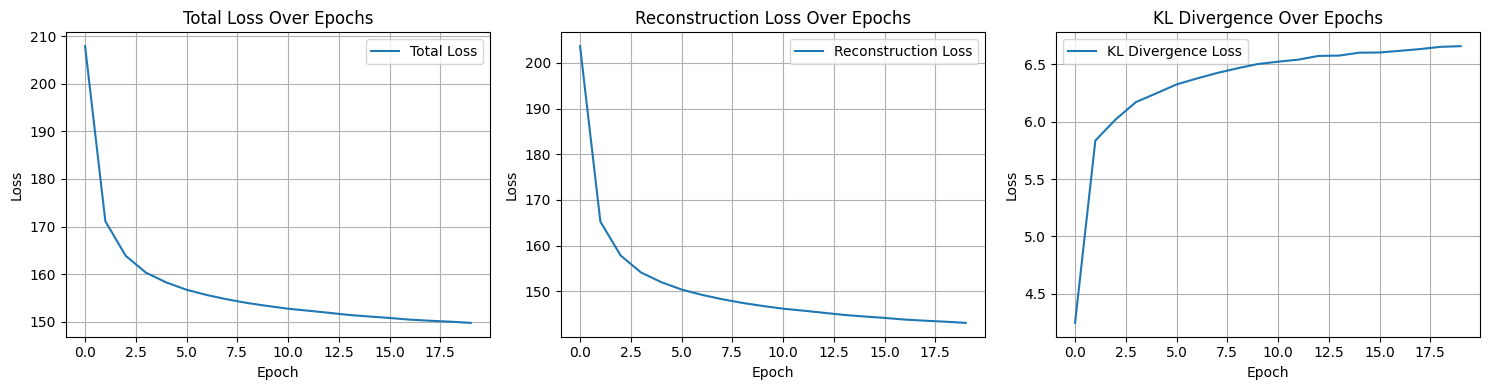


[INFO] Visualizing reconstructed images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


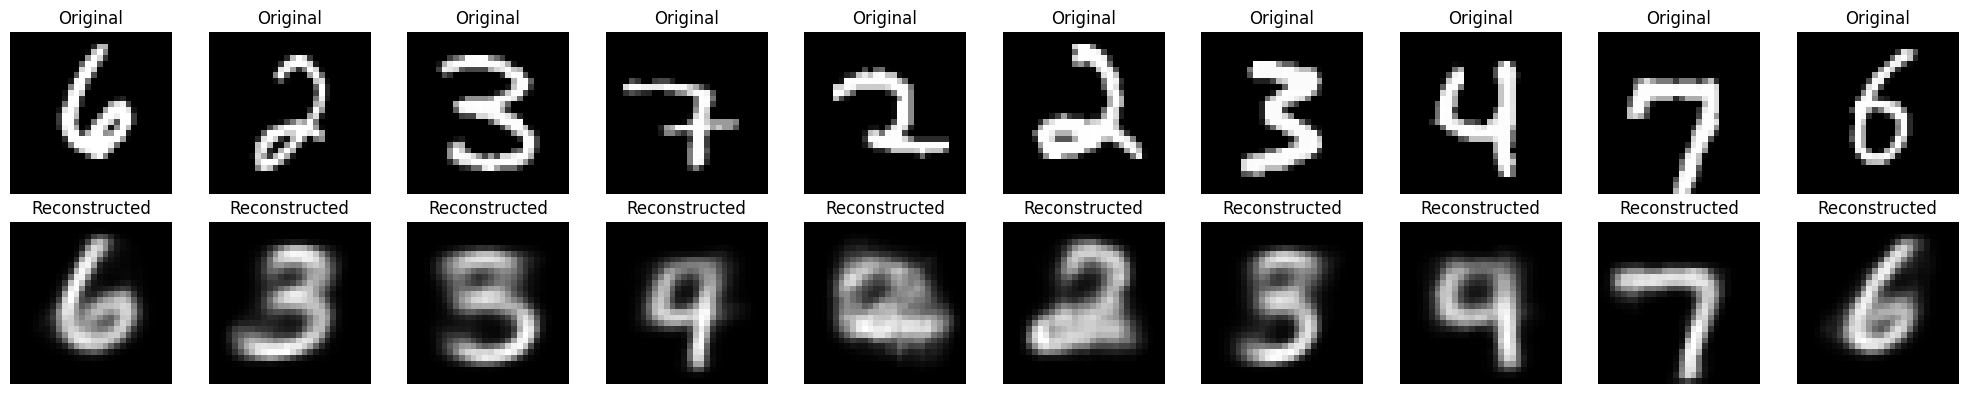


[INFO] Visualizing latent space...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


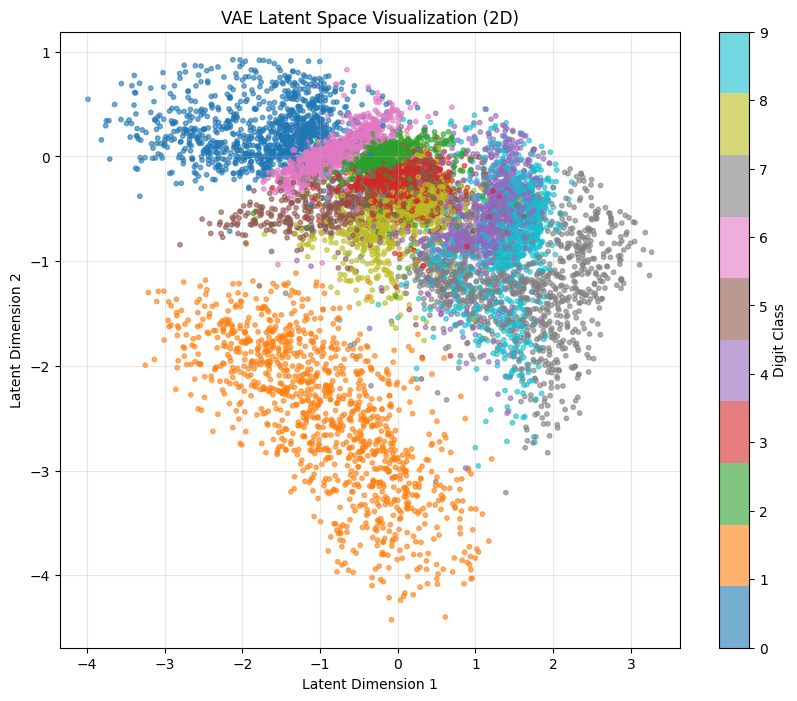


[INFO] Generating new images from latent space...


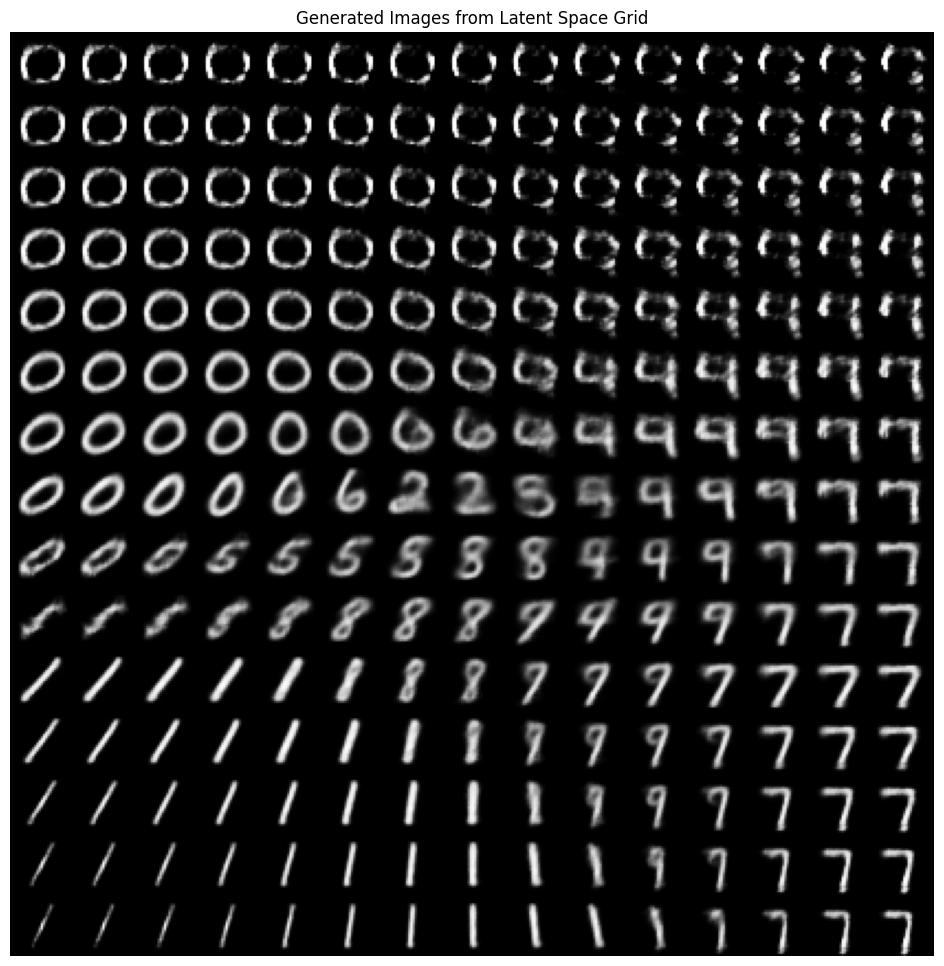


[INFO] Generating random new digits...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


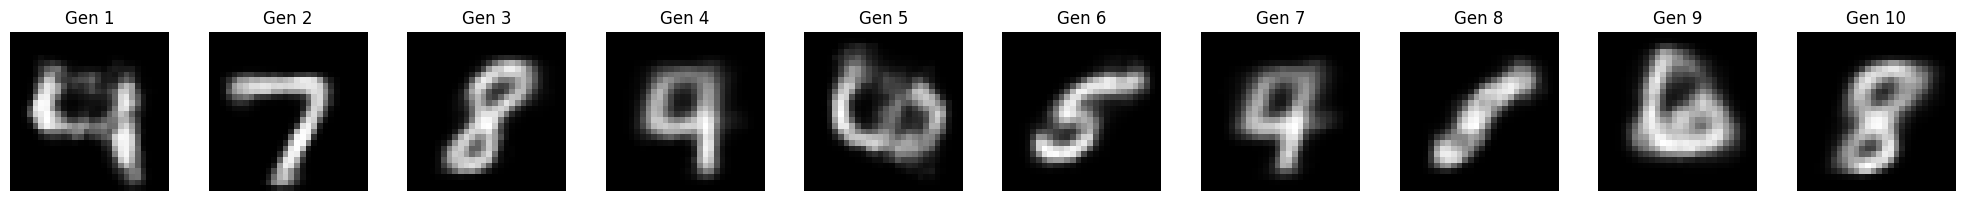


[INFO] Analysis complete!

=== VAE Architecture Summary ===
Latent Dimension: 2
Training Epochs: 20
Batch Size: 128
Final Total Loss: 149.7522
Final Reconstruction Loss: 143.0924
Final KL Divergence: 6.6598

=== Key Observations ===
1. KL Divergence encourages the latent space to follow a standard normal distribution
2. Reconstruction loss ensures generated images are similar to originals
3. The 2D latent space allows easy visualization of digit clusters
4. VAE can generate new, realistic digit images by sampling from latent space

[SUCCESS] VAE implementation and visualization complete!


In [8]:
# ============================================================
# CSC 4242 - Artificial Intelligence Assignment 01
# Variational Autoencoder (VAE) Implementation
# MNIST Dataset - Complete Colab Ready Script
# ============================================================

# ============================================================
# STEP 1: Import Libraries
# ============================================================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import mnist

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# ============================================================
# STEP 2: Load and Preprocess MNIST Dataset
# ============================================================
print("\n[INFO] Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to add channel dimension (28, 28) -> (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

# ============================================================
# STEP 3: Define VAE Architecture Parameters
# ============================================================
LATENT_DIM = 2  # Dimensionality of latent space (2D for easy visualization)
INPUT_SHAPE = (28, 28, 1)
BATCH_SIZE = 128
EPOCHS = 20

# ============================================================
# STEP 4: Build VAE Encoder
# ============================================================
print("\n[INFO] Building VAE Encoder...")

# Encoder Input
encoder_input = layers.Input(shape=INPUT_SHAPE, name='encoder_input')

# Convolutional Layer 1
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same', name='conv1')(encoder_input)
# Convolutional Layer 2
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same', name='conv2')(x)
# Flatten
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(16, activation='relu', name='dense_encoder')(x)

# Latent space: mean and log variance
z_mean = layers.Dense(LATENT_DIM, name='z_mean')(x)
z_log_var = layers.Dense(LATENT_DIM, name='z_log_var')(x)

# Sampling layer (reparameterization trick)
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Sampling()([z_mean, z_log_var])

# Create Encoder Model
encoder = Model(encoder_input, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# ============================================================
# STEP 5: Build VAE Decoder
# ============================================================
print("\n[INFO] Building VAE Decoder...")

# Decoder Input
latent_input = layers.Input(shape=(LATENT_DIM,), name='latent_input')

# Dense layer to reshape
x = layers.Dense(7 * 7 * 64, activation='relu', name='dense_decoder')(latent_input)
x = layers.Reshape((7, 7, 64), name='reshape')(x)

# Transposed Convolutional Layer 1 (Upsampling)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same', name='deconv1')(x)
# Transposed Convolutional Layer 2 (Upsampling)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same', name='deconv2')(x)

# Output layer
decoder_output = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same', name='decoder_output')(x)

# Create Decoder Model
decoder = Model(latent_input, decoder_output, name='decoder')
decoder.summary()

# ============================================================
# STEP 6: Build Complete VAE Model
# ============================================================
print("\n[INFO] Building complete VAE model...")

class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        """Forward pass through the VAE"""
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction

    def train_step(self, data):
        with tf.GradientTape() as tape:
            # Forward pass
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Reconstruction loss (Binary Cross-Entropy)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )

            # KL divergence loss
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )

            # Total loss
            total_loss = reconstruction_loss + kl_loss

        # Compute gradients and update weights
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # Update metrics
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        """Validation step"""
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)

        # Reconstruction loss
        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                keras.losses.binary_crossentropy(data, reconstruction),
                axis=(1, 2)
            )
        )

        # KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )

        # Total loss
        total_loss = reconstruction_loss + kl_loss

        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

# Instantiate VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))

print("\n[INFO] VAE model created successfully!")

# ============================================================
# STEP 7: Train the VAE
# ============================================================
print("\n[INFO] Training VAE...")
history = vae.fit(
    x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, None),
    verbose=1
)

print("\n[INFO] Training complete!")

# ============================================================
# STEP 8: Visualize Training History
# ============================================================
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Total Loss')
plt.title('Total Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(history.history['reconstruction_loss'], label='Reconstruction Loss')
plt.title('Reconstruction Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(history.history['kl_loss'], label='KL Divergence Loss')
plt.title('KL Divergence Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================================================
# STEP 9: Visualize Reconstructed Images
# ============================================================
print("\n[INFO] Visualizing reconstructed images...")

# Select 10 random test images
n_samples = 10
indices = np.random.choice(len(x_test), n_samples, replace=False)
test_images = x_test[indices]

# Encode and decode
z_mean, z_log_var, z = vae.encoder.predict(test_images)
reconstructed = vae.decoder.predict(z)

# Plot original vs reconstructed
plt.figure(figsize=(20, 4))
for i in range(n_samples):
    # Original images
    ax = plt.subplot(2, n_samples, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n_samples, i + 1 + n_samples)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

# ============================================================
# STEP 10: Visualize Latent Space (2D)
# ============================================================
print("\n[INFO] Visualizing latent space...")

# Encode all test images
z_mean, z_log_var, z = vae.encoder.predict(x_test)

# Plot latent space with color-coded digits
plt.figure(figsize=(10, 8))
scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test, cmap='tab10', alpha=0.6, s=10)
plt.colorbar(scatter, label='Digit Class')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('VAE Latent Space Visualization (2D)')
plt.grid(True, alpha=0.3)
plt.show()

# ============================================================
# STEP 11: Generate New Images from Latent Space
# ============================================================
print("\n[INFO] Generating new images from latent space...")

# Generate a grid of images by sampling from latent space
n = 15  # Number of images per dimension
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Create a grid of latent variable values
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        # Sample from latent space
        z_sample = np.array([[xi, yi]])
        # Decode
        x_decoded = vae.decoder.predict(z_sample, verbose=0)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(12, 12))
plt.imshow(figure, cmap='gray')
plt.title('Generated Images from Latent Space Grid')
plt.axis('off')
plt.show()

# ============================================================
# STEP 12: Generate Random New Digits
# ============================================================
print("\n[INFO] Generating random new digits...")

# Sample random points from standard normal distribution
n_random = 10
random_latent_vectors = np.random.normal(size=(n_random, LATENT_DIM))
generated_images = vae.decoder.predict(random_latent_vectors)

# Plot generated images
plt.figure(figsize=(20, 2))
for i in range(n_random):
    ax = plt.subplot(1, n_random, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Gen {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# ============================================================
# STEP 13: Analysis - Effect of Latent Dimension
# ============================================================
print("\n[INFO] Analysis complete!")
print("\n=== VAE Architecture Summary ===")
print(f"Latent Dimension: {LATENT_DIM}")
print(f"Training Epochs: {EPOCHS}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Final Total Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Reconstruction Loss: {history.history['reconstruction_loss'][-1]:.4f}")
print(f"Final KL Divergence: {history.history['kl_loss'][-1]:.4f}")

print("\n=== Key Observations ===")
print("1. KL Divergence encourages the latent space to follow a standard normal distribution")
print("2. Reconstruction loss ensures generated images are similar to originals")
print("3. The 2D latent space allows easy visualization of digit clusters")
print("4. VAE can generate new, realistic digit images by sampling from latent space")

print("\n[SUCCESS] VAE implementation and visualization complete!")

## Answers to Analysis Questions:

### 1. What is the role of the KL divergence term in the VAE loss function?

The Kullback-Leibler (KL) divergence term in the VAE loss function serves as a **regularization term**. Its primary role is to **force the learned latent distribution (encoder's output: $z_{mean}$ and $z_{log\_var}$) to be close to a predefined prior distribution**, typically a standard normal (Gaussian) distribution (mean 0, variance 1).

Without the KL divergence term, the VAE would behave like a standard autoencoder, potentially producing a discontinuous or disjoint latent space where interpolation might not yield meaningful samples. By enforcing the latent space to conform to a simple, known distribution, the KL divergence term ensures two key properties:

*   **Continuity**: It encourages the latent space to be smooth and continuous, meaning that small changes in the latent vector result in small, meaningful changes in the generated data. This makes interpolation and sampling from the latent space more effective.
*   **Completeness**: It ensures that all regions of the latent space, particularly those that are likely under the prior distribution, map to meaningful data. This prevents the VAE from only learning a few isolated clusters and makes the generative process more robust.

In essence, the KL divergence term balances the trade-off between **reconstruction quality** (how well the VAE reconstructs the input) and **latent space regularization** (how well the latent space conforms to the prior and allows for meaningful generation). A higher KL divergence indicates that the learned latent distribution deviates significantly from the prior, while a lower value means it's closer.

### 2. How does the latent space of a VAE differ from that of a standard autoencoder?

The fundamental difference lies in **how the latent space is learned and structured**:

*   **Standard Autoencoder (AE)**:
    *   **Deterministic Encoding**: The encoder maps an input directly to a single point in the latent space ($z$). There's no inherent structure or probability distribution enforced on this latent space.
    *   **Discontinuous Latent Space**: The latent space can be sparse and discontinuous. There might be large gaps between clusters of different data points, meaning that if you pick a random point in between, the decoder might produce gibberish.
    *   **Poor for Generation**: While an AE can reconstruct inputs, it's generally poor for generating novel data. Sampling from its latent space often leads to unrealistic or nonsensical outputs because there's no guarantee of semantic meaning in arbitrary latent points.

*   **Variational Autoencoder (VAE)**:
    *   **Probabilistic Encoding**: Instead of mapping an input to a single point $z$, the VAE's encoder maps it to the parameters of a probability distribution (typically mean $\mu$ and log-variance $\log\sigma^2$) in the latent space. A latent vector $z$ is then sampled from this learned distribution using the reparameterization trick.
    *   **Continuous and Structured Latent Space**: The KL divergence regularization term forces the learned latent distributions to overlap and conform to a continuous prior (e.g., standard normal). This makes the latent space dense and well-structured, where nearby points correspond to semantically similar data.
    *   **Excellent for Generation**: Because the VAE learns a continuous and well-behaved latent distribution, it can effectively generate novel, realistic data by simply sampling from the prior distribution (e.g., a standard normal) and passing these samples through the decoder. Interpolating between two latent vectors also yields smooth, meaningful transitions in the generated data.

In summary, a VAE's latent space is a **probabilistic, continuous, and disentangled representation** that is explicitly designed for generative tasks, unlike the purely deterministic and potentially chaotic latent space of a standard autoencoder.

### 3. What happens if you increase the dimensionality of the latent space?

Increasing the dimensionality of the latent space in both Autoencoders and VAEs has several implications:

*   **For Standard Autoencoders (AE)**:
    *   **Increased Capacity, Higher Risk of Memorization**: A larger latent space gives the autoencoder more capacity to simply memorize the training data rather than learning compressed, meaningful representations. If the latent dimension becomes too large (e.g., close to the input dimension), the encoder might learn an identity function, essentially copying the input to the latent space and back, thus defeating the purpose of dimensionality reduction and feature learning.
    *   **Less Generalization**: Memorization leads to poor generalization on unseen data.
    *   **Harder to Interpret/Visualize**: For dimensions higher than 3, the latent space becomes impossible to directly visualize, and its structure is harder to interpret.

*   **For Variational Autoencoders (VAE)**:
    *   **Better Reconstruction Quality (initially)**: A larger latent space allows the VAE to capture more fine-grained details of the input data, potentially leading to better reconstruction quality and lower reconstruction loss. The encoder has more 'room' to encode information.
    *   **Weaker Regularization, Increased KL Divergence**: The KL divergence term becomes less effective at regularizing the latent space towards the prior distribution. With more dimensions, it's easier for the learned latent distributions ($\mu$, $\sigma^2$) to deviate from the standard normal. This can lead to a phenomenon known as "posterior collapse" or "KL vanishing", where the VAE essentially ignores the KL divergence term and treats $z_{log\_var}$ as zero, effectively behaving like a deterministic autoencoder. In such cases, the generative capabilities might degrade.
    *   **Loss of Interpretability/Continuity**: While reconstruction might improve, the latent space might become less disentangled and harder to interpret. The continuity and smoothness that the KL divergence aims to enforce might be diluted across too many dimensions.
    *   **Increased Computational Cost**: More latent dimensions mean more parameters in the dense layers connecting the encoder to the latent space and the latent space to the decoder, increasing computational cost and memory usage.

In summary, while a larger latent space might initially improve reconstruction in VAEs, it often comes at the cost of weaker regularization from the KL divergence, potentially leading to a less structured and less generative model. Finding the optimal latent dimensionality is a crucial hyperparameter tuning step that balances reconstruction accuracy with the desired properties of a well-regularized, generative latent space.